In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/text.csv")
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (416809, 2)


In [ ]:
df.describe()

,label
count,416809.000000
mean,1.554271
std,1.490453
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [ ]:
df.isnull().sum()

,0
text,0
label,0


In [ ]:
df.duplicated().sum()

np.int64(686)

### "text" column

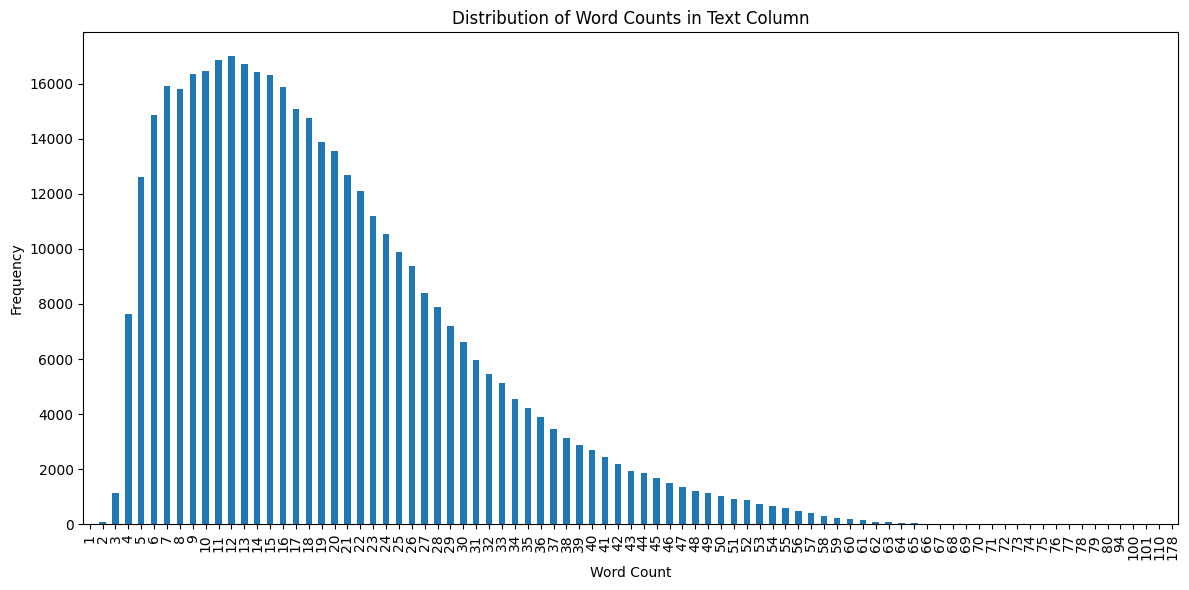

In [ ]:
import matplotlib.pyplot as plt

df['word_count'] = df['text'].str.split().str.len()
word_count_freq = df['word_count'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
word_count_freq.plot(kind='bar')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Text Column')
plt.tight_layout()
plt.show()

In [ ]:
low_word_count = df[df['word_count'].isin([0, 1, 2])]
print("Rows with word count of 0 or 1 or 2:")
print(low_word_count[['text', 'word_count']])

Rows with word count of 0 or 1 or 2:
                      text  word_count
28                    when           1
6689                    in           1
11417   before examination           2
18037            at hostel           2
21441          no response           2
...                    ...         ...
394784              summer           1
396170             one day           2
396579      while swimming           2
405165                  in           1
405378   article published           2

[105 rows x 2 columns]


In [ ]:
duplicates = low_word_count[low_word_count['text'].duplicated(keep=False)]

# If there are duplicates, check if their 'label' values are the same
if not duplicates.empty:
    print(f"Number of rows with duplicated 'text' (word count 1 or 2): {duplicates.shape[0]}")

    duplicate_groups = duplicates.groupby('text')
    print("\nAnalysis of duplicated 'text' and their 'label' values:")
    for text, group in duplicate_groups:
        label_counts = group['label'].value_counts()
        print(f"\nText: '{text}'")
        print(f"Appears {len(group)} times")
        if len(label_counts) == 1:
            print(f"All have the same label: {label_counts.index[0]}")
        else:
            print("Has different labels:")
            print(label_counts)
else:
    print("No duplicates found in 'text' column.")

Number of rows with duplicated 'text' (word count 1 or 2): 33

Analysis of duplicated 'text' and their 'label' values:

Text: 'at school'
Appears 2 times
Has different labels:
label
3    1
4    1
Name: count, dtype: int64

Text: 'doesnt apply'
Appears 2 times
Has different labels:
label
3    1
4    1
Name: count, dtype: int64

Text: 'in'
Appears 4 times
Has different labels:
label
0    2
3    1
4    1
Name: count, dtype: int64

Text: 'my mother'
Appears 2 times
Has different labels:
label
4    1
1    1
Name: count, dtype: int64

Text: 'never experienced'
Appears 2 times
Has different labels:
label
3    1
4    1
Name: count, dtype: int64

Text: 'no response'
Appears 6 times
Has different labels:
label
3    3
0    2
4    1
Name: count, dtype: int64

Text: 'once'
Appears 2 times
Has different labels:
label
4    1
3    1
Name: count, dtype: int64

Text: 'one day'
Appears 3 times
Has different labels:
label
3    1
0    1
4    1
Name: count, dtype: int64

Text: 'one evening'
Appears 2 times


In [ ]:
duplicates = df[df['text'].duplicated(keep=False)]

# Initialize counters
texts_same_label = []
texts_different_label = []

# If there are duplicates, analyze their 'label' values
if not duplicates.empty:
    duplicate_groups = duplicates.groupby('text')

    for text, group in duplicate_groups:
        unique_labels = group['label'].nunique()
        if unique_labels == 1:
            texts_same_label.append(text)
        else:
            texts_different_label.append(text)

    print(f"Found {len(texts_same_label)} duplicated 'text' values with the same 'label'")
    print(f"Found {len(texts_different_label)} duplicated 'text' values with different 'label'")
else:
    print("No duplicates found in 'text' column.")

Found 522 duplicated 'text' values with the same 'label'
Found 22295 duplicated 'text' values with different 'label'


In [ ]:
# Keep first occurrence of texts with same label
keep_same_label = df[df['text'].isin(texts_same_label)].drop_duplicates(subset='text', keep='first')

result = pd.concat([
    df[~df['text'].isin(duplicates['text'])],
    keep_same_label
])

# Exclude all rows with texts that have different labels
result = result[~result['text'].isin(texts_different_label)]


result = result.reset_index(drop=True)
print(f"Removed all occurrences of {len(texts_different_label)} duplicated 'text' values with different 'label'")
print(f"Removed duplicates for {len(texts_same_label)} duplicated 'text' values with same 'label', kept first occurrence")
print(f"Resulting DataFrame has {len(result)} rows.")

print("\nResulting DataFrame:")
print(result[['text', 'word_count', 'label']])

Removed all occurrences of 22295 duplicated 'text' values with different 'label'
Removed duplicates for 522 duplicated 'text' values with same 'label', kept first occurrence
Resulting DataFrame has 371527 rows.

Resulting DataFrame:
                                                     text  word_count  label
0       ive enjoyed being able to slouch about relax a...          45      0
1       i gave up my internship with the dmrg and am f...          12      4
2                              i dont know i feel so lost           7      0
3       i am a kindergarten teacher and i am thoroughl...          42      4
4              i was beginning to feel quite disheartened           7      0
...                                                   ...         ...    ...
371522  i feel broke inside but i wont admit sometimes...          32      0
371523                       i feel as rotten as can be l           8      0
371524                                        i feel safe           3     

In [ ]:
df['label'] = df['label'].replace(0,'Sadness')
df['label'] = df['label'].replace(1,'Joy')
df['label'] = df['label'].replace(2,'Love')
df['label'] = df['label'].replace(3,'Anger')
df['label'] = df['label'].replace(4,'Fear')
df['label'] = df['label'].replace(5,'Surprise')

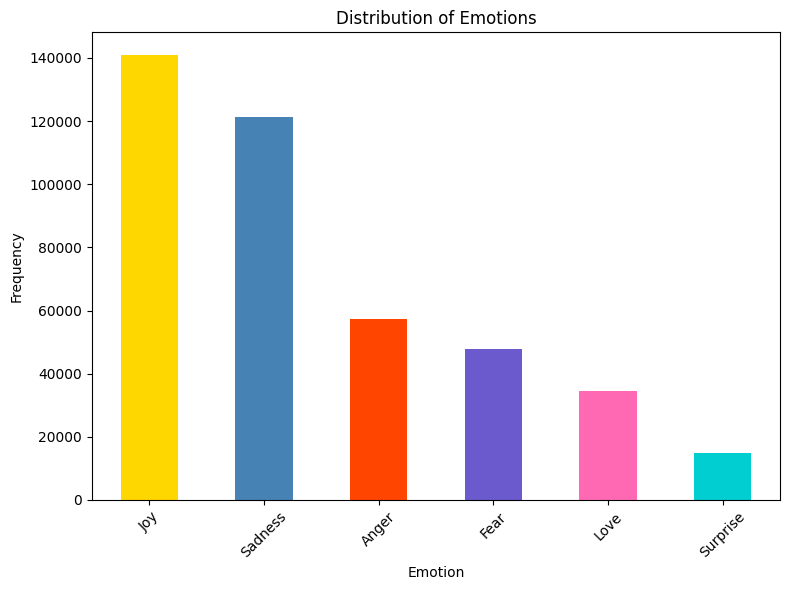

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

label_freq = df['label'].value_counts()

emotion_colors = {
    'Sadness': '#4682B4',   # Steel Blue
    'Joy': '#FFD700',       # Gold
    'Love': '#FF69B4',     # Hot Pink
    'Anger': '#FF4500',     # Orange Red
    'Fear': '#6A5ACD',      # Slate Blue
    'Surprise': '#00CED1'   # Dark Turquoise
}
colors = [emotion_colors[label] for label in label_freq.index]

# Create bar plot
plt.figure(figsize=(8, 6))
label_freq.plot(kind='bar', color=colors)
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Distribution of Emotions')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

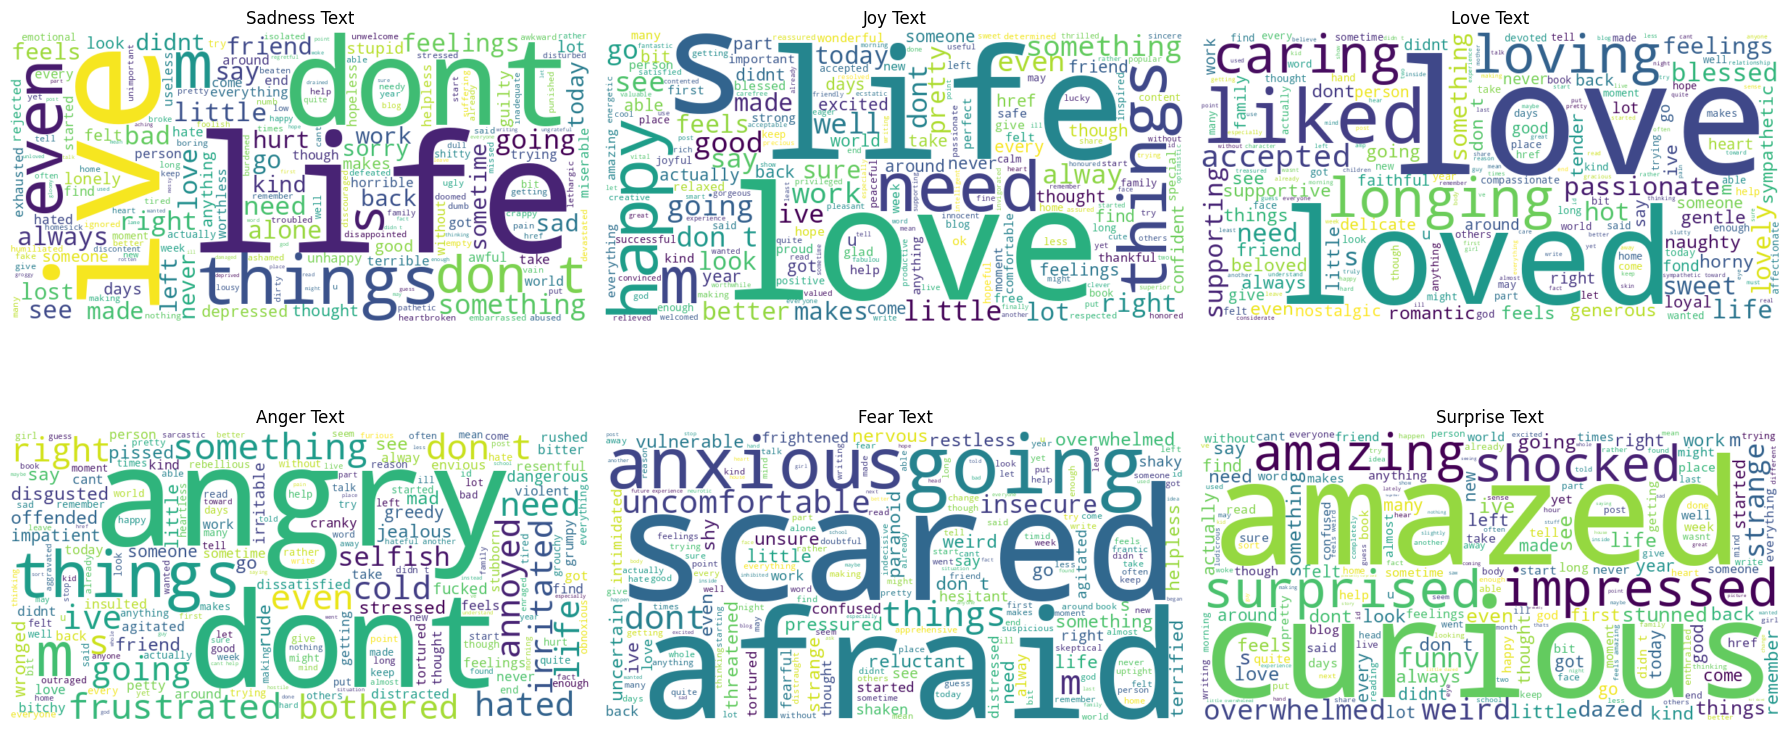

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define words to remove
words_to_remove = ['im', 'feel', 'feeling', 'know', 'thing', 'think', 'people', 'time', 'really', 'make', 'still', 'one', 'day', 'will', 'now', 'way', 'want', 'much']

# Function to clean text by removing specified words
def clean_text(text, words_to_remove):
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in [w.lower() for w in words_to_remove]]
    return ' '.join(cleaned_words)

df_cleaned = df.copy()
df_cleaned['text'] = df_cleaned['text'].apply(lambda x: clean_text(x, words_to_remove))

df_sadness = df_cleaned[df_cleaned['label'] == 'Sadness']
df_joy = df_cleaned[df_cleaned['label'] == 'Joy']
df_love = df_cleaned[df_cleaned['label'] == 'Love']
df_anger = df_cleaned[df_cleaned['label'] == 'Anger']
df_fear = df_cleaned[df_cleaned['label'] == 'Fear']
df_surprise = df_cleaned[df_cleaned['label'] == 'Surprise']

combined_sadness_text = ' '.join(df_sadness['text'])
combined_joy_text = ' '.join(df_joy['text'])
combined_love_text = ' '.join(df_love['text'])
combined_anger_text = ' '.join(df_anger['text'])
combined_fear_text = ' '.join(df_fear['text'])
combined_surprise_text = ' '.join(df_surprise['text'])

sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df['label'] = df['label'].replace('Sadness',0)
df['label'] = df['label'].replace('Joy',1)
df['label'] = df['label'].replace('Love',2)
df['label'] = df['label'].replace('Anger',3)
df['label'] = df['label'].replace('Fear',4)
df['label'] = df['label'].replace('Surprise',5)

<ipython-input-15-c55a740258fc>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace('Surprise',5)


In [ ]:
df.to_csv('data.csv', index=False)

## Train Test split

In [ ]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,text,label,word_count
0,i just feel really helpless and heavy hearted,4.0,8
1,ive enjoyed being able to slouch about relax a...,0.0,45
2,i gave up my internship with the dmrg and am f...,4.0,12
3,i dont know i feel so lost,0.0,7
4,i am a kindergarten teacher and i am thoroughl...,4.0,42


In [ ]:
from sklearn.model_selection import train_test_split

texts = df['text'].values
labels = df['label'].values

train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

In [ ]:
from ollama import Client
client = Client(host ="172.16.2.229:5050")

def embed(text):
    response = client.embed(model = "nomic-embed-text:latest", input = text)
    return response['embeddings']

train_texts_series = pd.Series(train_texts)

# Apply embedding to train_texts
embeddings_train_texts = train_texts_series.apply(embed)

# Convert to list or array
embeddings_train_texts = embeddings_train_texts.tolist()

print(embeddings_train_texts[:5])

## Text Preprocessing

In [ ]:
test_texts_series = pd.Series(test_texts)

# Apply embedding to train_texts
embeddings_test_texts = test_texts_series.apply(embed)

# Convert to list or array
embeddings_test_texts = embeddings_test_texts.tolist()

print(embeddings_test_texts[:5])

In [ ]:
embeddings_train_texts['label'] = train_labels
embeddings_test_texts['label'] = test_labels

embeddings_train_texts.to_csv('train_preprocessed.csv', index=False)
embeddings_test_texts.to_csv('test_preprocessed.csv', index=False)

print("Data split, preprocessing, and normalization complete. Saved to 'train_preprocessed.csv' and 'test_preprocessed.csv'.")

In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# NGramTokenizer to mimic WEKA's NGramTokenizer with specified delimiters
def ngram_tokenizer(text):
    text = text.lower()
    delimiters = r'[\r\n\t.,;:\'\"()?!]+'
    tokens = [token for token in re.split(delimiters, text) if token]
    ngrams = []
    for n in range(1, 4):
        for i in range(len(tokens) - n + 1):
            ngram = ' '.join(tokens[i:i + n])
            ngrams.append(ngram)
    return ngrams

# Load Rainbow stopwords (approximated with NLTK's English stopwords)
stop_words = set(stopwords.words('english'))

# Initialize Snowball Stemmer
stemmer = SnowballStemmer('english')

# Preprocessing function
def preprocess_text(text):
    delimiters = r'[\r\n\t.,;:\'\"()?!]+'
    tokens = [token for token in re.split(delimiters, text.lower()) if token]
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

In [ ]:
train_text_preprocessed = [preprocess_text(text) for text in train_texts]
test_text_preprocessed = [preprocess_text(text) for text in test_texts]

In [ ]:
# Vectorization
vectorizer = CountVectorizer(
    tokenizer=ngram_tokenizer,
    max_features=1000,
    min_df=1,
    lowercase=False
)
X_train = vectorizer.fit_transform(train_text_preprocessed)  # Fit on train
X_test = vectorizer.transform(test_text_preprocessed)       # Transform test

In [ ]:
# Normalize the data
normalizer = Normalizer(norm='l2')  # L2 normalization
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

In [ ]:
train_df = pd.DataFrame(X_train_normalized.toarray(), columns=vectorizer.get_feature_names_out())
test_df = pd.DataFrame(X_test_normalized.toarray(), columns=vectorizer.get_feature_names_out())

train_df['label'] = train_labels
test_df['label'] = test_labels

train_df.to_csv('train_preprocessed.csv', index=False)
test_df.to_csv('test_preprocessed.csv', index=False)

print("Data split, preprocessing, and normalization complete. Saved to 'train_preprocessed.csv' and 'test_preprocessed.csv'.")

Data split, preprocessing, and normalization complete. Saved to 'train_preprocessed.csv' and 'test_preprocessed.csv'.
